In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (AutoDateLocator, YearLocator, MonthLocator,
                              DayLocator, WeekdayLocator, HourLocator,
                              MinuteLocator, SecondLocator, MicrosecondLocator,
                              RRuleLocator, rrulewrapper, MONTHLY,
                              MO, TU, WE, TH, FR, SA, SU, DateFormatter,
                              AutoDateFormatter, ConciseDateFormatter)
import datetime
from os import listdir, walk
from os.path import isfile, join

from bokeh.plotting import figure, show

['2024-07-28', '2024-07-28']


C:\Users\jPfitsch\AppData\Local\Temp\ipykernel_17640\1859358627.py:54: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  longterm['datetime'] = pd.to_datetime(longterm['Date'].astype(str) + ' ' + longterm['Time'].astype(str))


['2024-07-28', '2024-07-28']


C:\Users\jPfitsch\AppData\Local\Temp\ipykernel_17640\1859358627.py:54: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  longterm['datetime'] = pd.to_datetime(longterm['Date'].astype(str) + ' ' + longterm['Time'].astype(str))


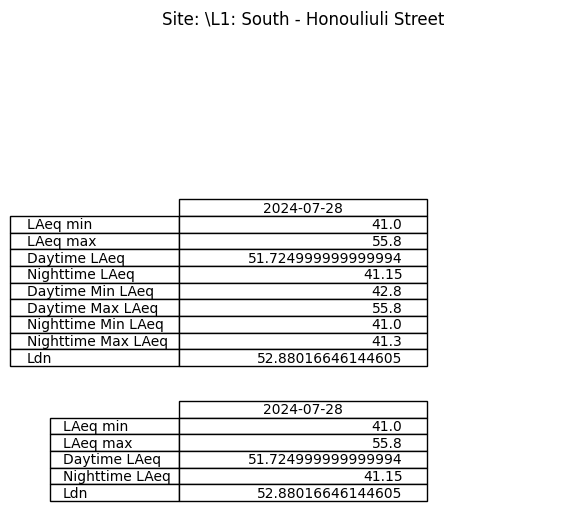

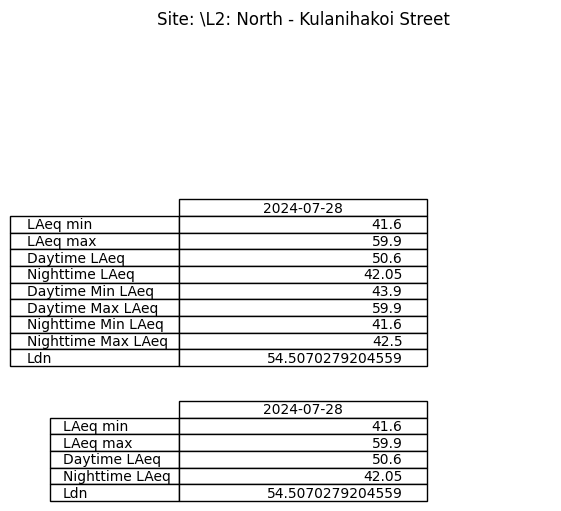

In [6]:
### JUST STATISTICS TABLE PLOTTING ###

# allrawpath = '//DLA-04/Shared/KAILUA PROJECTS/2023/P23-028 Hilton Hawaiian Village Cooling Tower/Noise_survey/raw_data/'
# site_list = ['L1: Tapas Tower',
#              'L2: Hilton Tower']
# slm_list = ['B_meter_1435/',
#             'C_meter_2499/']
# alldays = [['2024-02-13','2024-02-13'],
#            ['2024-02-13','2024-02-13'],
#            ['2024-02-13','2024-02-13'],
#            ['2024-02-13','2024-02-13']]
allrawpath = '//DLA-04/Shared/KAILUA PROJECTS/2021/P21-012 East Kapolei Elementary School EA/Test Data/'
site_list = ['L1: South - Honouliuli Street',
             'L2: North - Kulanihakoi Street']
slm_list = ['L1_1435_South/',
            'L2_2499_North/']
# alldays = [['2024-07-28'],
#            ['2024-07-29'],
#            ['2024-07-30'],
#            ['2024-07-31'],
#            ['2024-08-01'],
#            ['2024-08-02'],]

alldays = [['2024-07-28','2024-07-28'],
           ['2024-07-28','2024-07-28'],
           ['2024-07-29','2024-07-29'],
           ['2024-07-29','2024-07-29'],
           ['2024-07-30','2024-07-30'],
           ['2024-07-30','2024-07-30'],
           ['2024-07-31','2024-07-31'],
           ['2024-07-31','2024-07-31'],
           ['2024-08-01','2024-08-01'],
           ['2024-08-01','2024-08-01'],
           ['2024-08-02','2024-08-02'],
           ['2024-08-02','2024-08-02']]

for j in range(len(slm_list)):
    curr_archive = join(allrawpath,slm_list[j])
    archive_date = alldays[j]
    print(archive_date)
    path_datafiles = [f for f in listdir(curr_archive) if isfile(join(curr_archive,f))]
    #only read excel files, filter for .xlsx
    path_datafiles = [k for k in path_datafiles if '.xlsx' in k]
    # read all xcel files into single dataframe
    datasheet = 'Measurement History'
    longterm = pd.DataFrame()
    for i in range(len(path_datafiles)):
        curr_longterm = pd.read_excel(curr_archive+path_datafiles[i],datasheet)
        longterm = pd.concat([longterm, curr_longterm])
    #remove periods from columns 
    longterm.columns = longterm.columns.str.replace(".","")
    longterm.columns = longterm.columns.str.replace("#","")
    longterm['Time'] = longterm['Time'].apply(clean_time_column)
    longterm['datetime'] = pd.to_datetime(longterm['Date'].astype(str) + ' ' + longterm['Time'].astype(str))
    longterm = longterm.set_index('datetime')

    #####-=-=-=-=- statistics-=-=--=-=#######
# for days in archive_date:
    # currday = longterm.get(days)
    dayone = longterm.loc[archive_date[0]]
    dateone = archive_date[0] # string for date display
    daytwo =longterm.loc[archive_date[1]]
    datetwo = archive_date[1]
    # can we figure out how to loop through these? yup

    fig, [ax1, ax2] = plt.subplots(2,1)
    ax1.set_axis_off()
    ax2.set_axis_off()
    title_one = join('Site: ',site_list[j])
    # plot.title(join(site_list[j],dateone))

    ax1.set_title(title_one)
    daytime = dayone.between_time('07:00:00','21:00:00')
    nighttime = pd.concat([dayone.between_time('00:00:00','06:00:00'),dayone.between_time('22:00:00','23:00:00')])
    daytime_mean = np.mean(daytime.LAeq)
    night_mean = np.mean(nighttime.LAeq)
    daytime_logmean = 10*(np.log10((np.sum(10**(0.1*daytime.LAeq)))/np.count_nonzero(daytime.LAeq)))
    nighttime_logmean = 10*(np.log10((np.sum(10**(0.1*nighttime.LAeq)))/np.count_nonzero(nighttime.LAeq)))
    
    Level_dn = 10*(np.log10((15*(10**(daytime_logmean/10))+9*(10**((nighttime_logmean+10)/10)))/24))
    row_labels = ['LAeq min','LAeq max','Daytime LAeq','Nighttime LAeq',
                  'Daytime Min LAeq','Daytime Max LAeq',
                  'Nighttime Min LAeq','Nighttime Max LAeq',
                  'Ldn']
    col_labels = [dateone]
    tabledata = [[min(dayone.LAeq)],
                [max(dayone.LAeq)],
                [np.mean(daytime.LAeq)],
                [np.mean(nighttime.LAeq)],
                [min(daytime.LAeq)],
                [max(daytime.LAeq)],
                [min(nighttime.LAeq)],
                [max(nighttime.LAeq)],
                [Level_dn]]
    
    table = ax1.table(cellText=tabledata,
                colWidths=[0.5]*3,
                rowLabels=row_labels,
                colLabels=col_labels
                )
    
    # plot.title(join(site_list[j],datetwo))
    daytime = daytwo.between_time('07:00:00','21:00:00')
    nighttime = pd.concat([daytwo.between_time('00:00:00','06:00:00'),daytwo.between_time('22:00:00','23:00:00')])
    daytime_mean = np.mean(daytwo.LAeq)
    night_mean = np.mean(nighttime.LAeq)
    daytime_logmean = 10*(np.log10((np.sum(10**(0.1*daytime.LAeq)))/np.count_nonzero(daytime.LAeq)))
    nighttime_logmean = 10*(np.log10((np.sum(10**(0.1*nighttime.LAeq)))/np.count_nonzero(nighttime.LAeq)))
    
    Level_dn = 10*(np.log10((15*(10**(daytime_logmean/10))+9*(10**((nighttime_logmean+10)/10)))/24))

    row_labels = ['LAeq min','LAeq max','Daytime LAeq','Nighttime LAeq','Ldn']
    col_labels = [datetwo]
    tabledata = [[min(daytwo.LAeq)],
                [max(daytwo.LAeq)],
                [np.mean(daytime.LAeq)],
                [np.mean(nighttime.LAeq)],
                [Level_dn]]
    title_two = join('Site: ',site_list[j])

    table = ax2.table(cellText=tabledata,
                colWidths=[0.5]*3,
                rowLabels=row_labels,
                colLabels=col_labels,
                # loc='lower right'
                )
    # fig.tight_layout()

In [ ]:
# plotting all the L sites 
def clean_time_column(time_str):
    if isinstance(time_str, pd.Timestamp):  
        return time_str.strftime('%H:%M:%S')  
    elif ' ' in time_str:  # Check if a space exists
        return time_str.split(' ')[1] 
    else: 
        return time_str  # Return the original value if no space
    

allrawpath = '//DLA-04/Shared/KAILUA PROJECTS/2021/P21-012 East Kapolei Elementary School EA/Test Data/'
site_list = ['L1: South - Honouliuli Street',
             'L2: North - Kulanihakoi Street']
slm_list = ['L1_1435_South/',
            'L2_2499_North/']
alldays = [['2024-07-28'],
           ['2024-07-29'],
           ['2024-07-30'],
           ['2024-07-31'],
           ['2024-08-01'],
           ['2024-08-02'],]

# join(allrawpath,slm_list[1])
for j in range(len(slm_list)):
    curr_archive = join(allrawpath,slm_list[j])
    archive_date = alldays[j]
    path_datafiles = [f for f in listdir(curr_archive) if isfile(join(curr_archive,f))]
    #only read excel files, filter for .xlsx
    path_datafiles = [k for k in path_datafiles if '.xlsx' in k]
    # read all xcel files into single dataframe
    datasheet = 'Measurement History'
    longterm = pd.DataFrame()
    for i in range(len(path_datafiles)):
        curr_longterm = pd.read_excel(curr_archive+path_datafiles[i],datasheet)
        longterm = pd.concat([longterm, curr_longterm])
    #remove periods from columns 
    longterm.columns = longterm.columns.str.replace(".","")
    longterm.columns = longterm.columns.str.replace("#","")
    longterm['Time'] = longterm['Time'].apply(clean_time_column)
    longterm['datetime'] = pd.to_datetime(longterm['Date'].astype(str) + ' ' + longterm['Time'].astype(str))
    longterm = longterm.set_index('datetime')

    #####-=-=-=-=-plotting Line graphs ONLY -=-=--=-=#######
    for days in archive_date:
        currday = longterm.get(days)
        dayone = longterm.loc[archive_date[0]]
        dateone = archive_date[0] # string for date display

    
        fig,ax1 = plot.subplots()
        fig.supxlabel("Date and Time of Measurement")
        fig.supylabel("Hourly Averaged Equivalent Sound Level, Leq (dBA)")

        # plot.plot(dayone.Time,dayone.LAeq, color = 'blue', linestyle = '-', label = 'LAeq')
        plot.plot(dayone.Time,dayone.LAeq, color = 'blue', linestyle = '-', label = 'LAeq')
        plot.plot(dayone.Time,dayone.LASmax, color = 'red', linestyle = ':', label = 'LASmax')
        plot.plot(dayone.Time,dayone.LAS9000,color = 'green', linestyle = '--', label = 'LAS90')

        ax1.set_ylim(35, 80)
        ax1.set_yticks(np.arange(35,80,5))
        # ax1.xaxis.set_major_locator(HourLocator(byhour=range(0,24,1)))
        # ax1.xaxis.set_major_formatter(DateFormatter('%H'))
        plot.grid(True)
        
        ax1.set_title(join(site_list[j],dateone)) 

        plot.axvspan('00:00:00','07:00:00',
                    color = 'grey', alpha = 0.5)
        plot.axvspan('22:00:00','23:00:00',
                    color = 'grey', alpha = 0.5)
        plot.tick_params(axis='x', rotation = 55)

        plot.show(fig1)
    

In [4]:
import matplotlib.pyplot as plt
import ipdb
import pandas as pd
# Assuming alldays and slm_list are defined
# alldays = [...]
# slm_list = [...]
def clean_time_column(time_str):
    if isinstance(time_str, pd.Timestamp):  
        return time_str.strftime('%H:%M:%S')  
    elif ' ' in time_str:  # Check if a space exists
        return time_str.split(' ')[1] 
    else: 
        return time_str  # Return the original value if no space
    

In [2]:
allrawpath = '//DLA-04/Shared/KAILUA PROJECTS/2021/P21-012 East Kapolei Elementary School EA/Test Data/'
site_list = ['L1: South - Honouliuli Street',
             'L2: North - Kulanihakoi Street']
slm_list = ['L1_1435_South/',
            'L2_2499_North/']
alldays = [['2024-07-28'],
           ['2024-07-29'],
           ['2024-07-30'],
           ['2024-07-31'],
           ['2024-08-01'],
           ['2024-08-02'],]

C:\Users\jPfitsch\AppData\Local\Temp\ipykernel_17640\2186344284.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  longterm['datetime'] = pd.to_datetime(longterm['Date'].astype(str) + ' ' + longterm['Time'].astype(str))


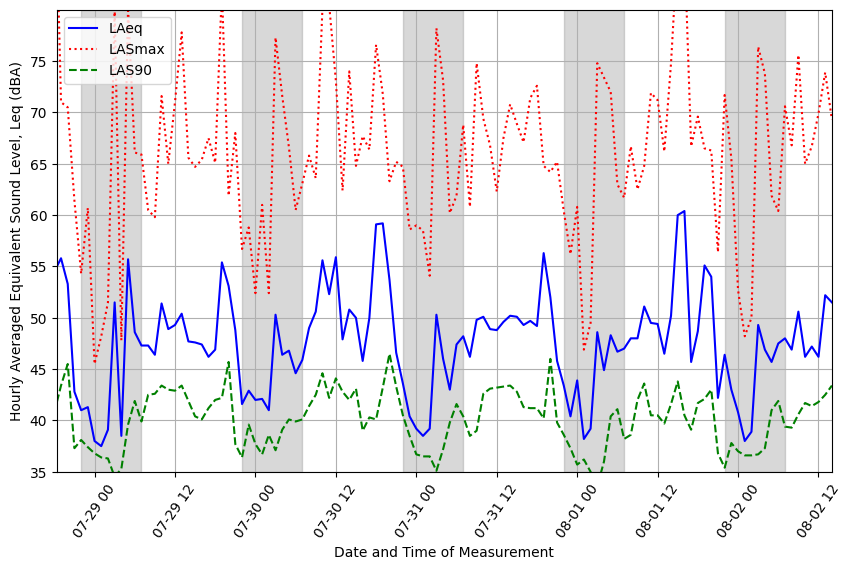

plotting:  2024-07-28 L1_1435_South/


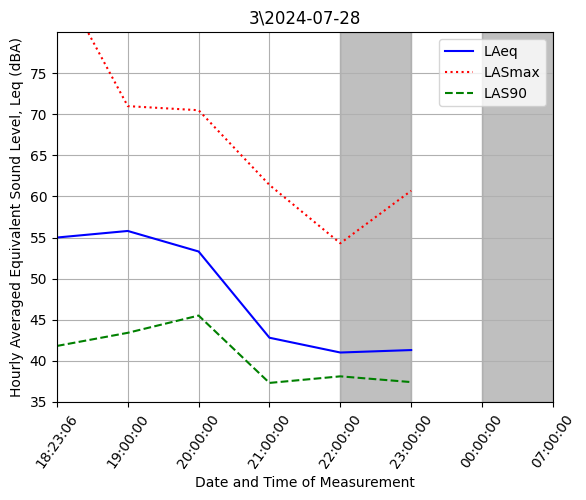

plotting:  2024-07-28 L1_1435_South/


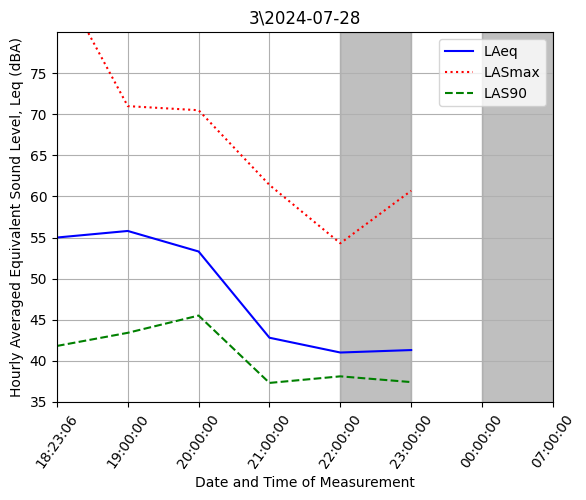

plotting:  2024-07-29 L1_1435_South/


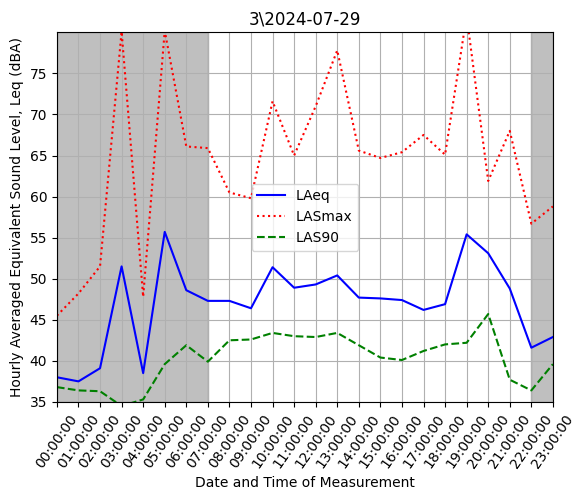

plotting:  2024-07-29 L1_1435_South/


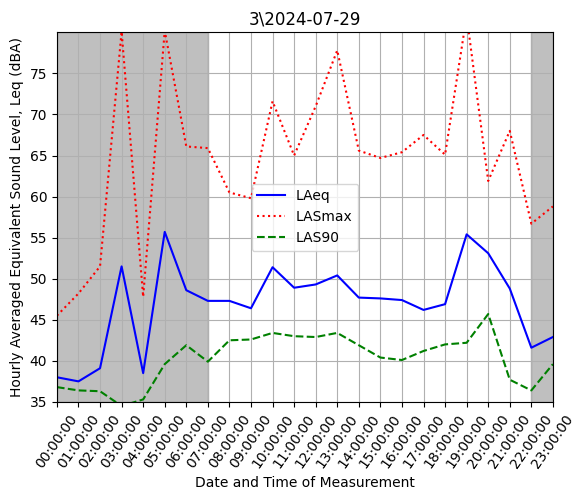

plotting:  2024-07-30 L1_1435_South/


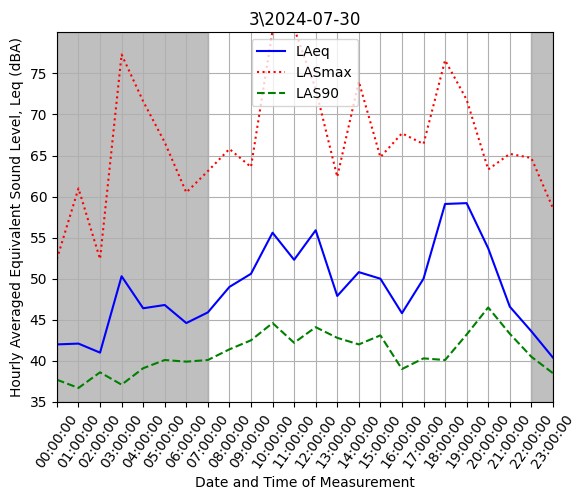

plotting:  2024-07-30 L1_1435_South/


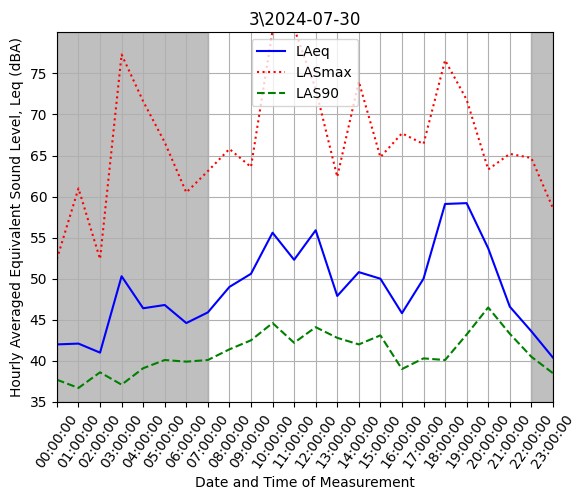

plotting:  2024-07-31 L1_1435_South/


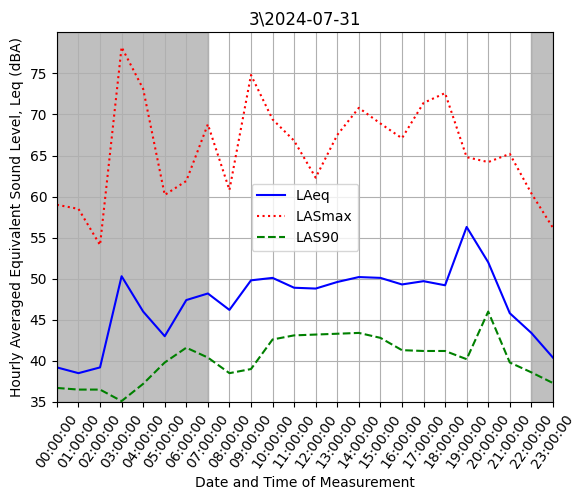

plotting:  2024-07-31 L1_1435_South/


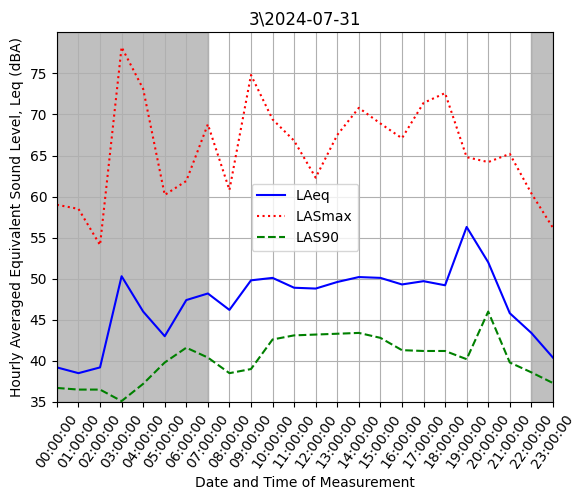

plotting:  2024-08-01 L1_1435_South/


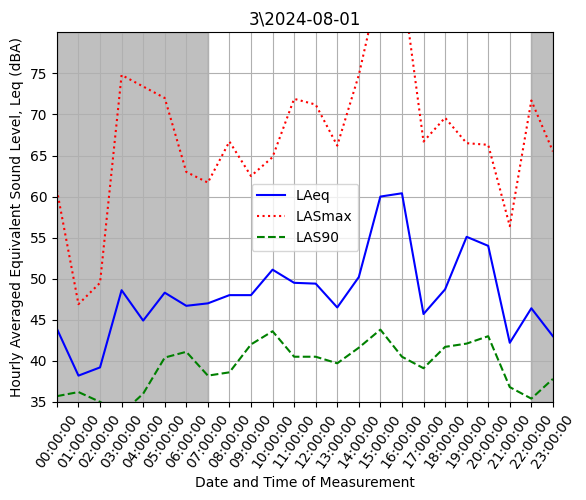

plotting:  2024-08-01 L1_1435_South/


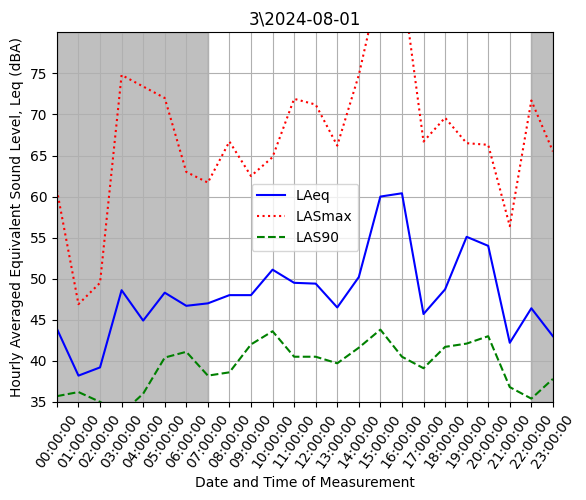

plotting:  2024-08-02 L1_1435_South/


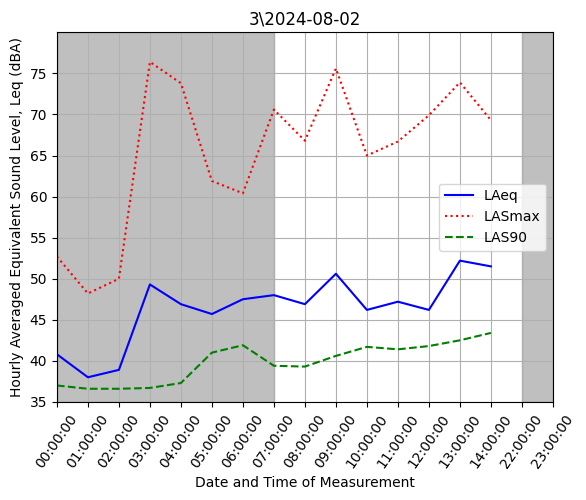

plotting:  2024-08-02 L1_1435_South/


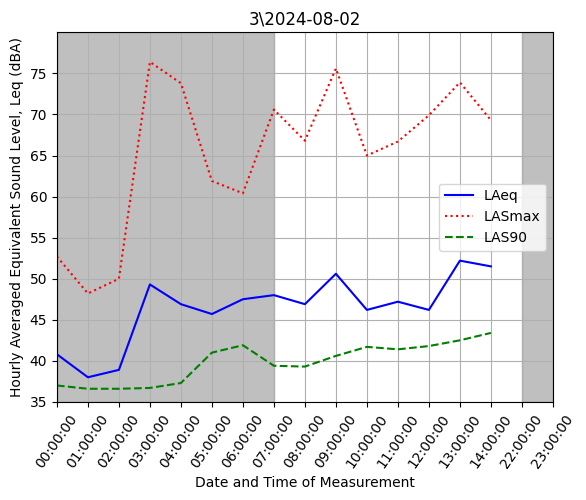

C:\Users\jPfitsch\AppData\Local\Temp\ipykernel_17640\2186344284.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  longterm['datetime'] = pd.to_datetime(longterm['Date'].astype(str) + ' ' + longterm['Time'].astype(str))


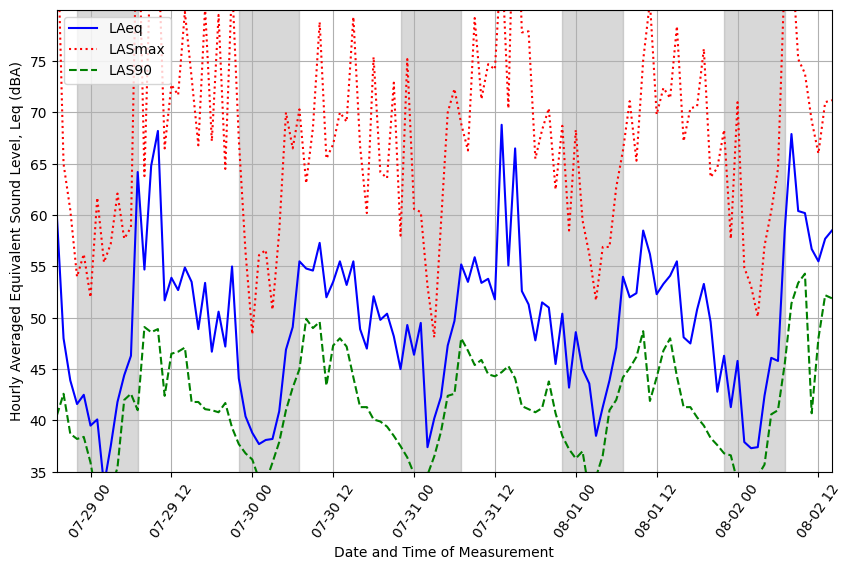

plotting:  2024-07-28 L2_2499_North/


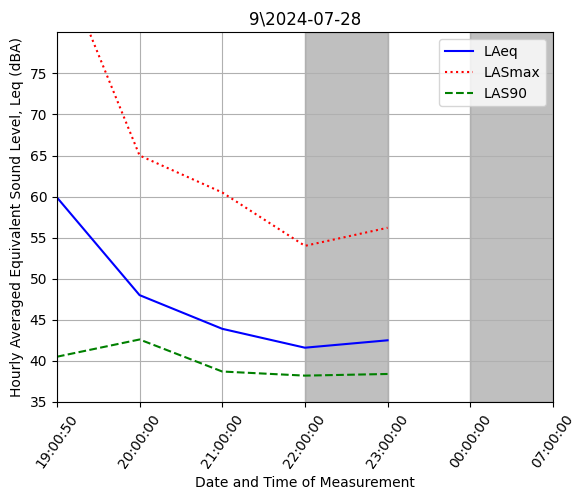

plotting:  2024-07-28 L2_2499_North/


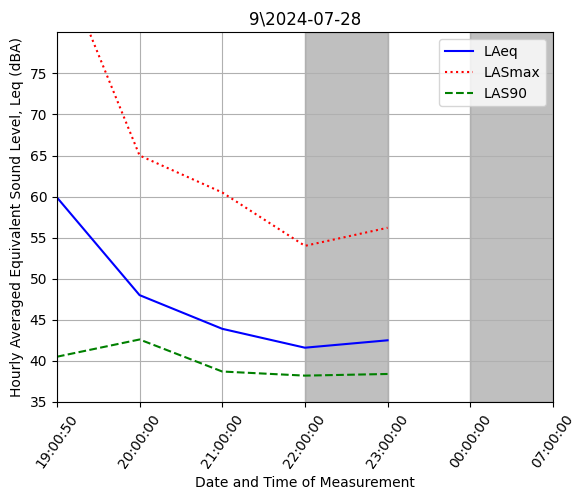

plotting:  2024-07-29 L2_2499_North/


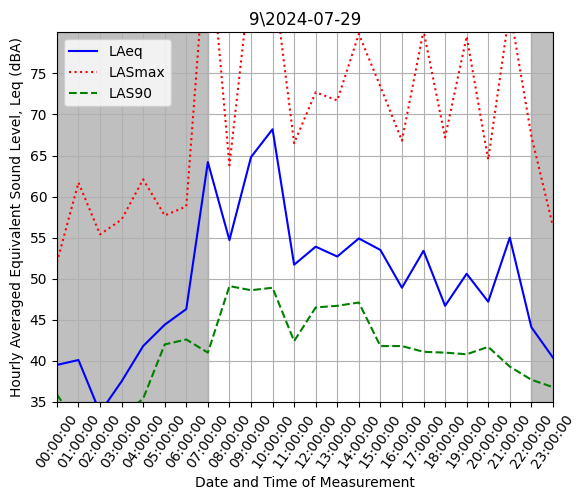

plotting:  2024-07-29 L2_2499_North/


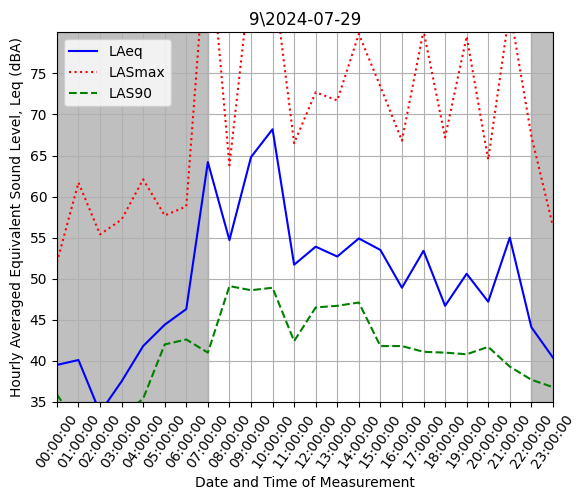

plotting:  2024-07-30 L2_2499_North/


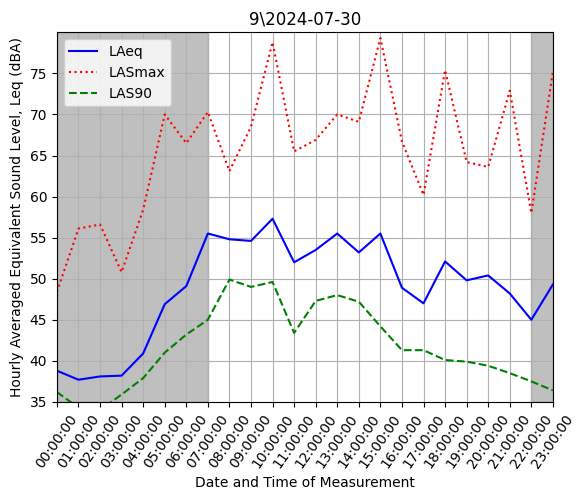

plotting:  2024-07-30 L2_2499_North/


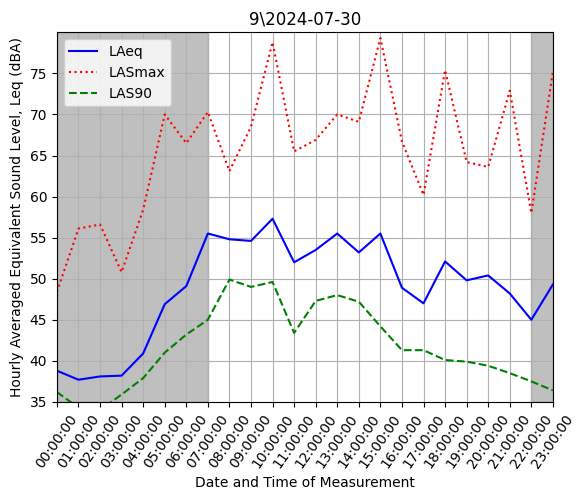

plotting:  2024-07-31 L2_2499_North/


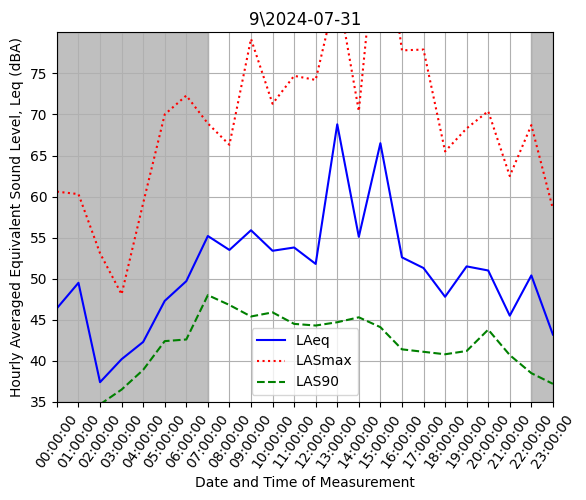

plotting:  2024-07-31 L2_2499_North/


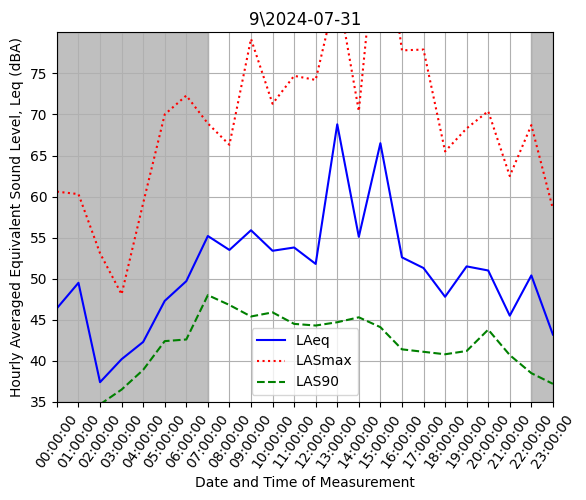

plotting:  2024-08-01 L2_2499_North/


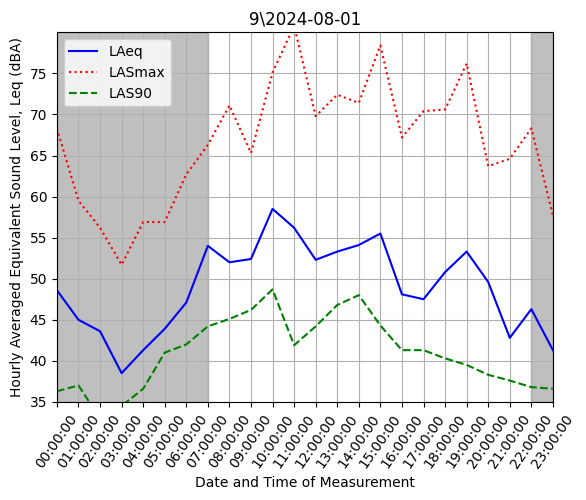

plotting:  2024-08-01 L2_2499_North/


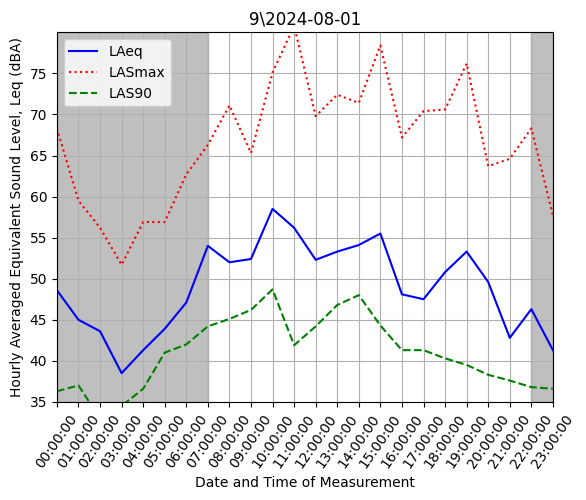

plotting:  2024-08-02 L2_2499_North/


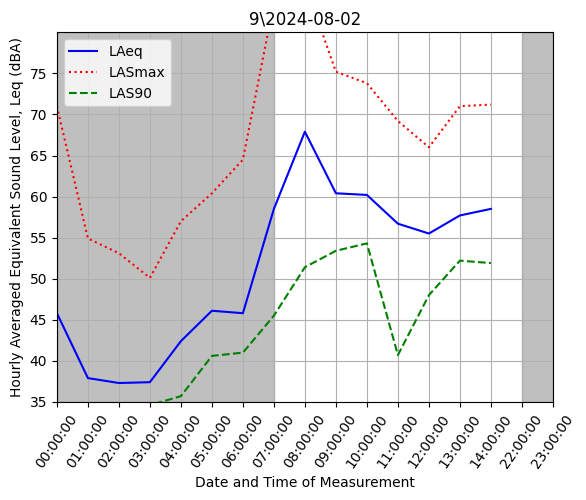

plotting:  2024-08-02 L2_2499_North/


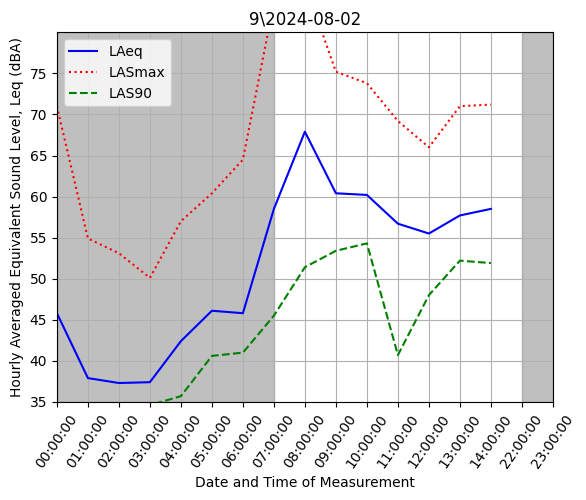

In [8]:
import datetime
import ipdb
import pandas as pd
from os import listdir
from os.path import isfile, join
################ THIS WORKS --- 8/23/2024 -=-=-=-=- ##################
# loop is working propelry, plots are per-day, per site. 
# working on title labeling

for i, slm in enumerate(slm_list):
    
    curr_archive = join(allrawpath, slm)
    path_datafiles = [f for f in listdir(curr_archive) if isfile(join(curr_archive, f))]
    path_datafiles = [k for k in path_datafiles if '.xlsx' in k]

    # Read all Excel files into a single DataFrame
    datasheet = 'Measurement History'
    longterm = pd.DataFrame()
    for i in range(len(path_datafiles)):
        curr_longterm = pd.read_excel(join(curr_archive, path_datafiles[i]), datasheet)
        longterm = pd.concat([longterm, curr_longterm])


    # Remove periods from columns
    longterm.columns = longterm.columns.str.replace(".", "")
    longterm.columns = longterm.columns.str.replace("#", "")
    longterm['Time'] = longterm['Time'].apply(clean_time_column)
    longterm['datetime'] = pd.to_datetime(longterm['Date'].astype(str) + ' ' + longterm['Time'].astype(str))
    longterm = longterm.set_index('datetime')
    longterm['Date'] = pd.to_datetime(longterm['Date'])

    # remove the time data from the date column, keeping the date only
    longterm['Date'] = longterm['Date'].dt.strftime('%Y-%m-%d')
    
    # plot the entire longterm dataset
    plt.figure(figsize=(10, 6))
    plt.plot(longterm.index, longterm.LAeq, color = 'blue', linestyle = '-', label = 'LAeq')
    plt.plot(longterm.index, longterm.LASmax, color = 'red', linestyle = ':', label = 'LASmax')
    plt.plot(longterm.index, longterm.LAS9000, color = 'green', linestyle = '--', label = 'LAS90')
    plt.ylabel("Hourly Averaged Equivalent Sound Level, Leq (dBA)")
    plt.xlabel("Date and Time of Measurement")
    plt.ylim(35, 80)
    plt.yticks(np.arange(35,80,5))

    # Define nighttime hours (e.g., 8 PM to 6 AM)
    night_start = 22  # 10 PM
    night_end = 7     # 7 AM

    # Shade nighttime hours
    for day in pd.date_range(start='2024-07-28', end='2024-08-01'):
        night_start_time = day.replace(hour=night_start, minute=0, second=0)
        night_end_time = (day + pd.Timedelta(days=1)).replace(hour=night_end, minute=0, second=0)
        plt.axvspan(night_start_time, night_end_time, color='grey', alpha=0.3)

    plt.tick_params(axis='x', rotation = 55)
    plt.grid(True)
    plt.legend()
    plt.margins(x=0)
    plt.show()

    for day in alldays:
        # filter longterm for the specified day
        single_day = longterm[longterm['Date'] == day[0]]

        # plot title should be slm name and date
        plt.title(join(slm[i], day[0]))
        print('plotting: ', day[0], slm)

        plt.plot(single_day.Time, single_day.LAeq, color = 'blue', linestyle = '-', label = 'LAeq')
        plt.plot(single_day.Time, single_day.LASmax, color = 'red', linestyle = ':', label = 'LASmax')
        plt.plot(single_day.Time, single_day.LAS9000, color = 'green', linestyle = '--', label = 'LAS90')
        plt.ylabel("Hourly Averaged Equivalent Sound Level, Leq (dBA)")
        plt.xlabel("Date and Time of Measurement")
        plt.ylim(35, 80)
        plt.yticks(np.arange(35,80,5))
        plt.axvspan('00:00:00','07:00:00',
                    color = 'grey', alpha = 0.5)
        plt.axvspan('22:00:00','23:00:00',
                    color = 'grey', alpha = 0.5)
        plt.tick_params(axis='x', rotation = 55)
        plt.grid(True)
        plt.margins(x=0)
        plt.legend()
        plt.show()


C:\Users\jPfitsch\AppData\Local\Temp\ipykernel_40160\3444228730.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  longterm['datetime'] = pd.to_datetime(longterm['Date'].astype(str) + ' ' + longterm['Time'].astype(str))


plotting:  2024-07-28 L1_1435_South/
plotting:  2024-07-29 L1_1435_South/
plotting:  2024-07-30 L1_1435_South/
plotting:  2024-07-31 L1_1435_South/
plotting:  2024-08-01 L1_1435_South/
plotting:  2024-08-02 L1_1435_South/


C:\Users\jPfitsch\AppData\Local\Temp\ipykernel_40160\3444228730.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  longterm['datetime'] = pd.to_datetime(longterm['Date'].astype(str) + ' ' + longterm['Time'].astype(str))


plotting:  2024-07-28 L2_2499_North/
plotting:  2024-07-29 L2_2499_North/
plotting:  2024-07-30 L2_2499_North/
plotting:  2024-07-31 L2_2499_North/
plotting:  2024-08-01 L2_2499_North/
plotting:  2024-08-02 L2_2499_North/


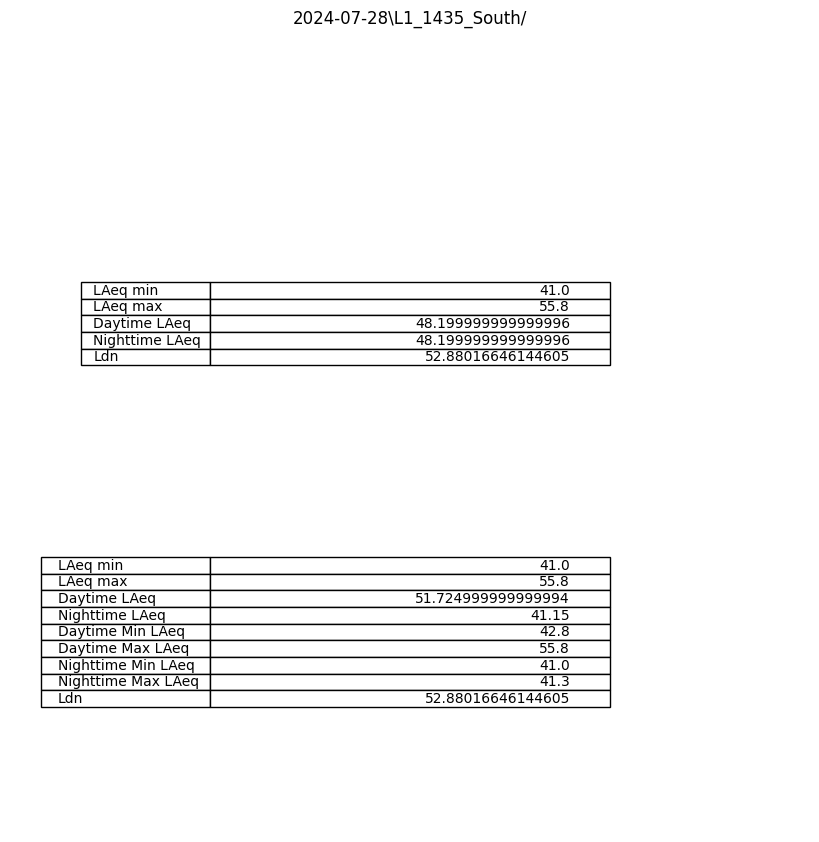

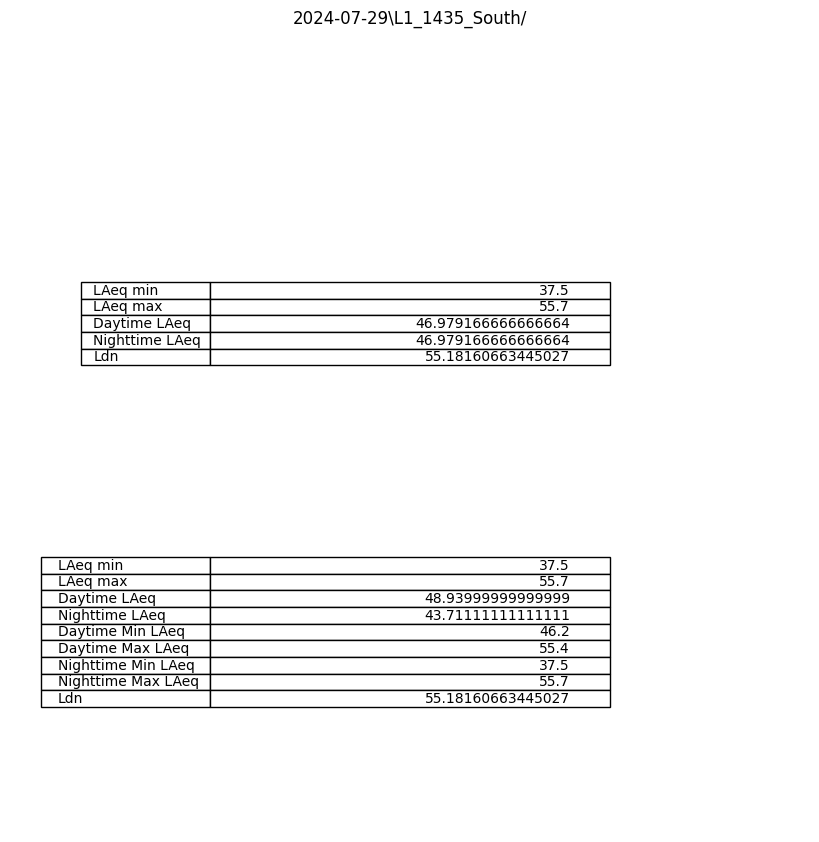

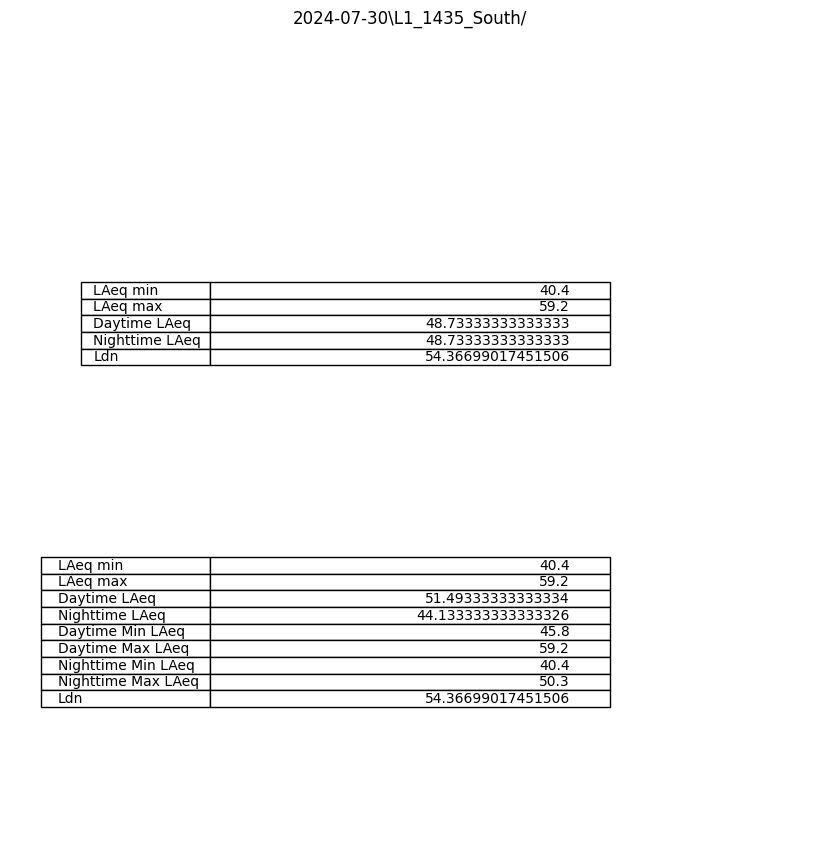

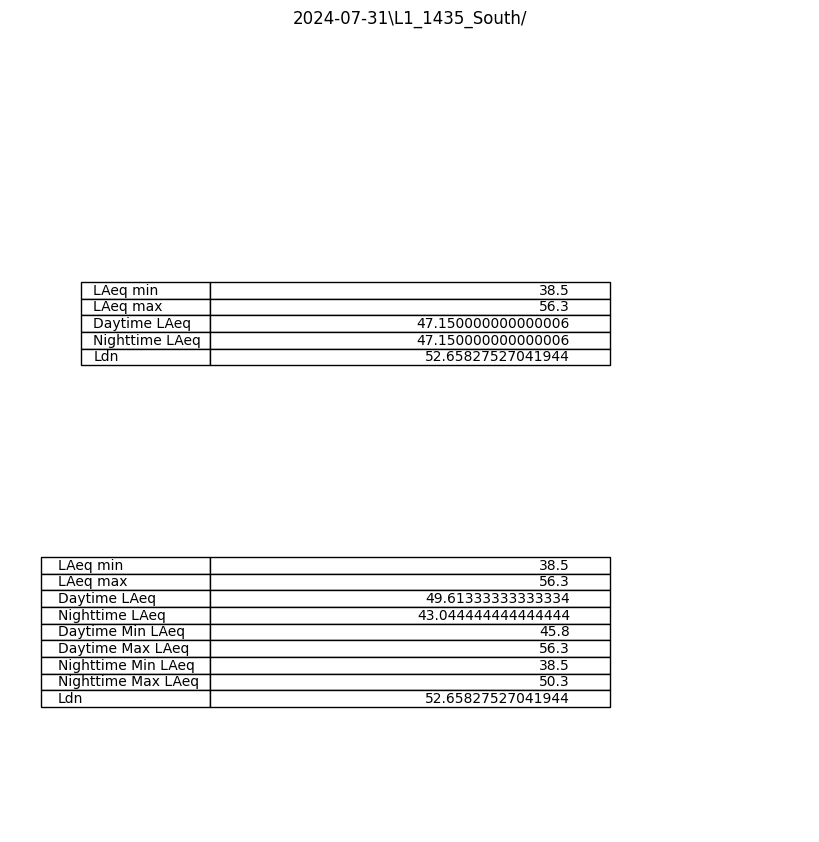

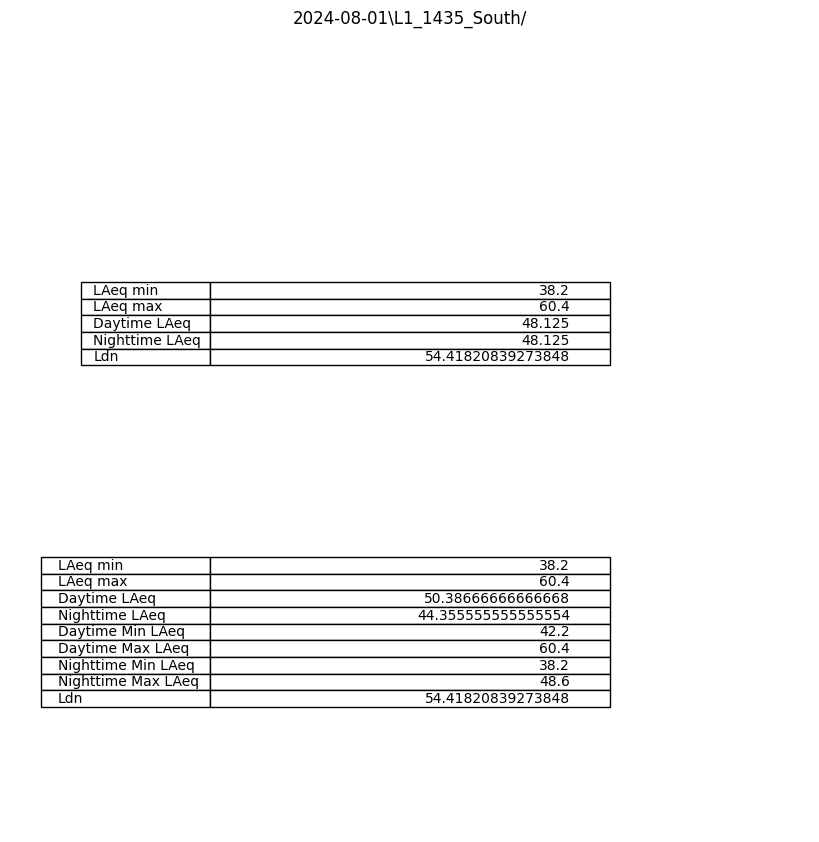

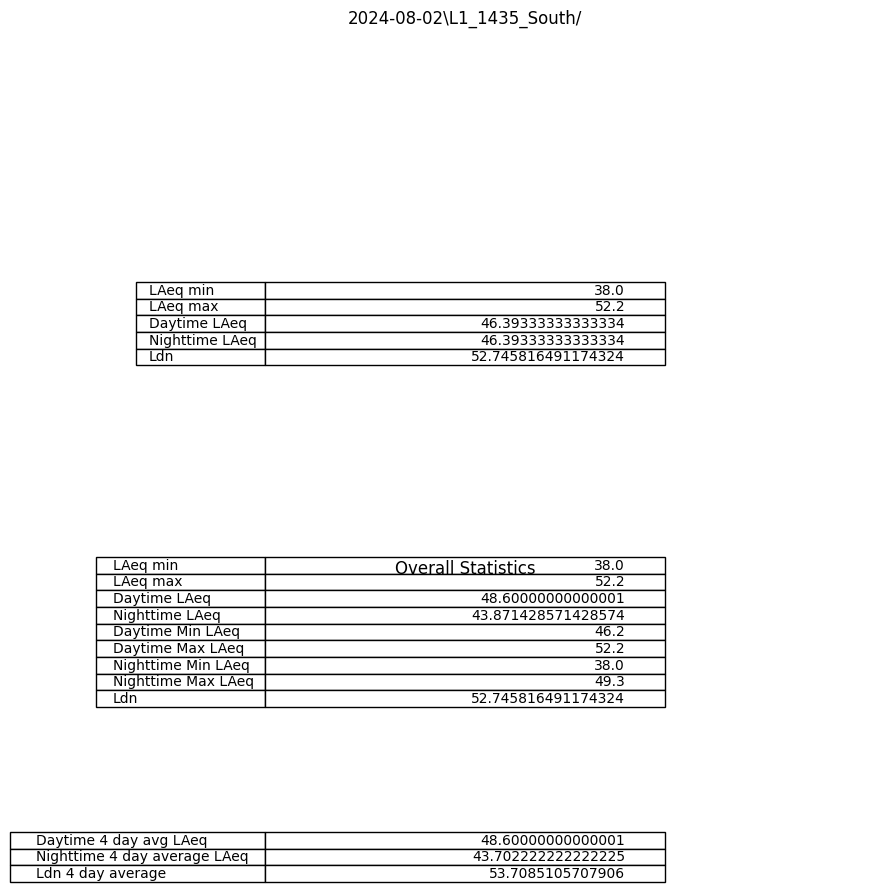

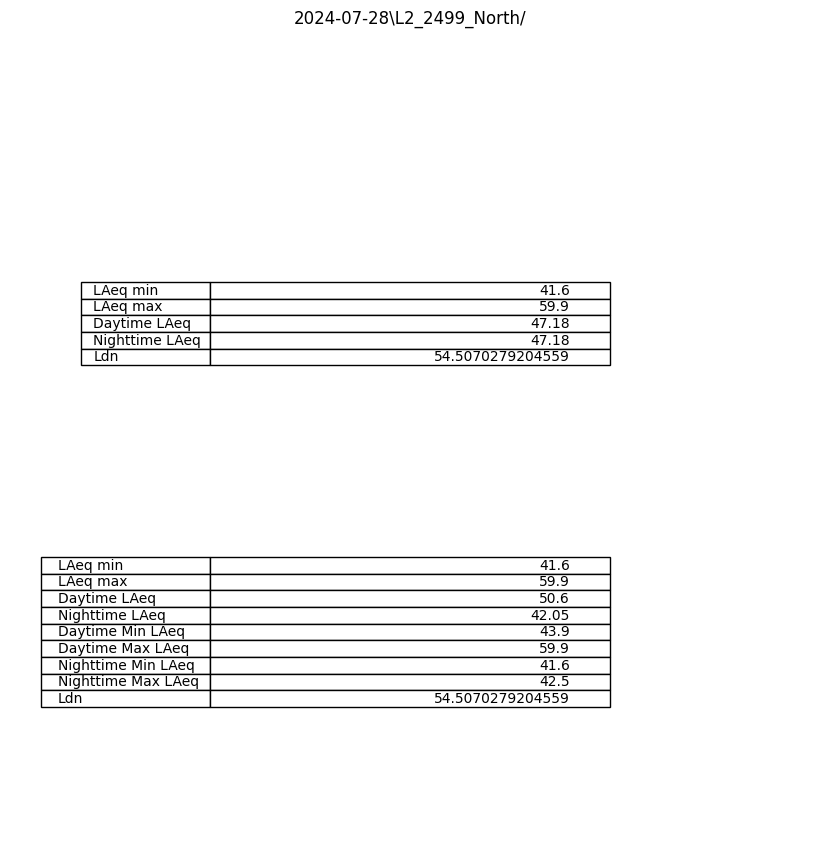

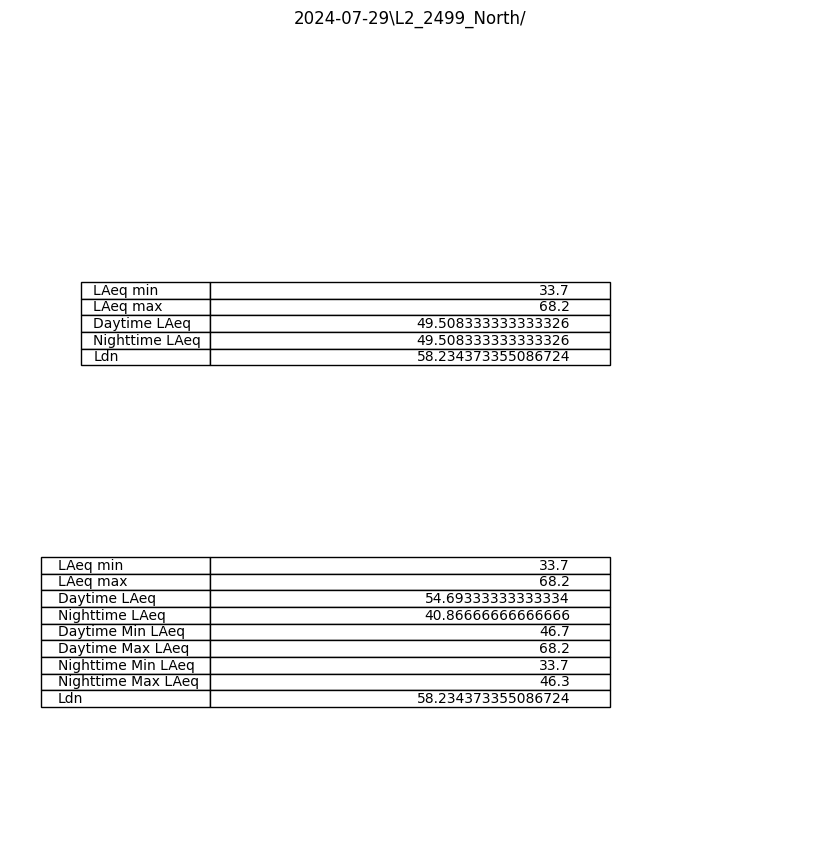

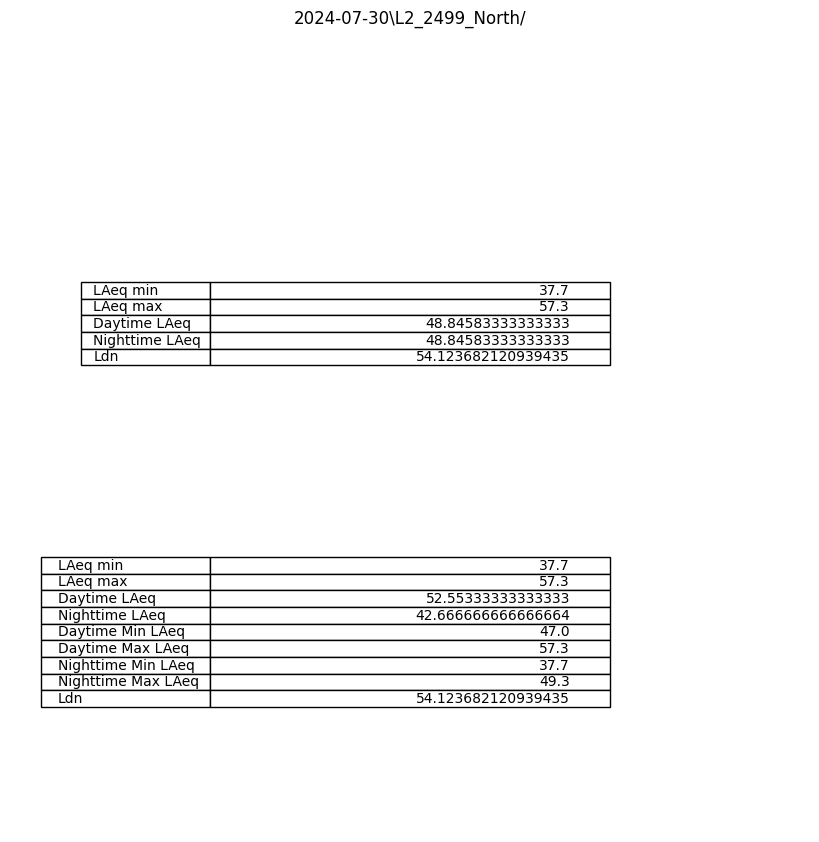

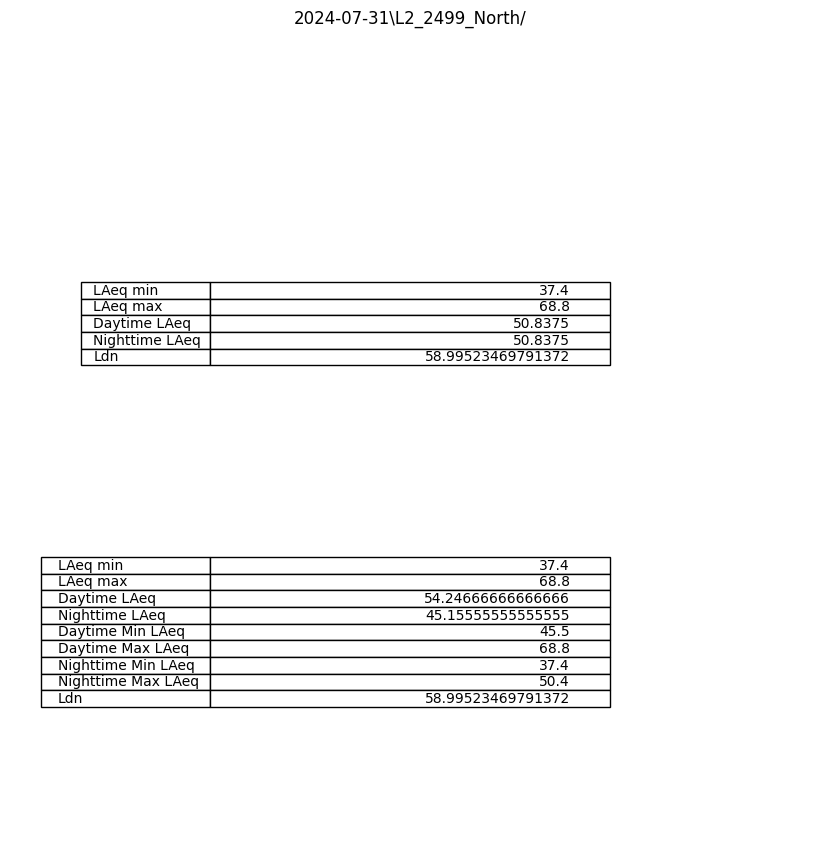

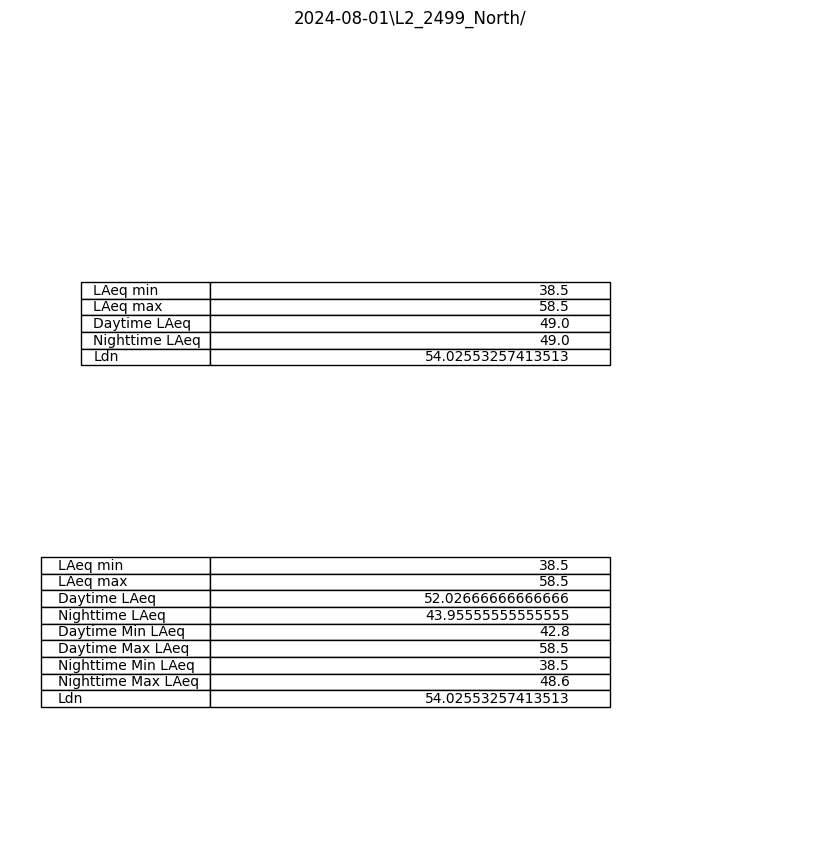

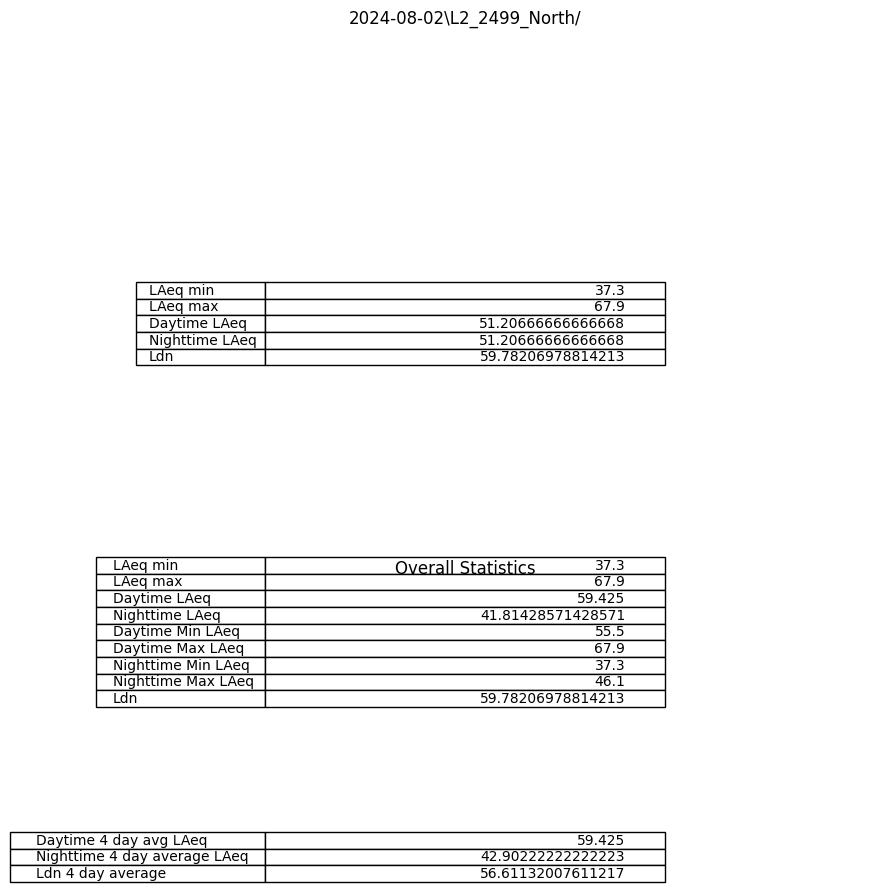

In [19]:
import datetime
import ipdb
import pandas as pd
from os import listdir
from os.path import isfile, join
################ THIS WORKS --- 8/23/2024 -=-=-=-=- ##################
# loop is working propelry, plots are per-day, per site. 
# working on title labeling

for i, slm in enumerate(slm_list):
    
    curr_archive = join(allrawpath, slm)
    path_datafiles = [f for f in listdir(curr_archive) if isfile(join(curr_archive, f))]
    path_datafiles = [k for k in path_datafiles if '.xlsx' in k]

    # Read all Excel files into a single DataFrame
    datasheet = 'Measurement History'
    longterm = pd.DataFrame()
    for i in range(len(path_datafiles)):
        curr_longterm = pd.read_excel(join(curr_archive, path_datafiles[i]), datasheet)
        longterm = pd.concat([longterm, curr_longterm])


    # Remove periods from columns
    longterm.columns = longterm.columns.str.replace(".", "")
    longterm.columns = longterm.columns.str.replace("#", "")
    longterm['Time'] = longterm['Time'].apply(clean_time_column)
    longterm['datetime'] = pd.to_datetime(longterm['Date'].astype(str) + ' ' + longterm['Time'].astype(str))
    longterm = longterm.set_index('datetime')
    longterm['Date'] = pd.to_datetime(longterm['Date'])

    # remove the time data from the date column, keeping the date only
    longterm['Date'] = longterm['Date'].dt.strftime('%Y-%m-%d')
    all_days_nighttime_LAeq = pd.DataFrame()
    all_days_daytime = pd.DataFrame()
    all_days_ldn = pd.DataFrame()
    for day in alldays:
        # filter longterm for the specified day
        single_day = longterm[longterm['Date'] == day[0]]
        # plt.title(join(slm[i], day[0]))
        print('plotting: ', day[0], slm)
        fig, [ax1, ax2, ax3] = plt.subplots(3,1)
        ax1.set_axis_off()
        ax2.set_axis_off()
        ax3.set_axis_off()
        # arrange tables in a 3x1 grid
        fig.set_size_inches(10, 10)
        fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)

        daytime = single_day.between_time('07:00:00','21:00:00')
        nighttime = pd.concat([single_day.between_time('00:00:00','06:00:00'),single_day.between_time('22:00:00','23:00:00')])
        daytime_mean = np.mean(single_day.LAeq)
        night_mean = np.mean(single_day.LAeq)
        daytime_logmean = 10*(np.log10((np.sum(10**(0.1*daytime.LAeq)))/np.count_nonzero(daytime.LAeq)))
        nighttime_logmean = 10*(np.log10((np.sum(10**(0.1*nighttime.LAeq)))/np.count_nonzero(nighttime.LAeq)))

        Level_dn = 10*(np.log10((15*(10**(daytime_logmean/10))+9*(10**((nighttime_logmean+10)/10)))/24))

        # append daytime mean to all_days_daytime
        all_days_daytime_Laeq = pd.concat([all_days_daytime, daytime])
        # append nighttime mean to all_days_LAeq
        all_days_nighttime_LAeq = pd.concat([all_days_nighttime_LAeq, nighttime])
        # append ldn to all_days_ldn
        all_days_ldn = pd.concat([all_days_ldn, pd.DataFrame([Level_dn])])

        table1_row_labels = ['LAeq min','LAeq max','Daytime LAeq','Nighttime LAeq','Ldn']
        # col_labels = [str(single_day)]
        tabledata_overallstats = [[min(single_day.LAeq)],
                    [max(single_day.LAeq)],
                    [np.mean(single_day.LAeq)],
                    [np.mean(single_day.LAeq)],
                    [Level_dn]]
        # title_two = join('Site: ',site_list[j])
        # title label is the day and the slm 
        title_label = join(day[0], slm)
        #insert title label
        ax1.set_title(title_label)
        table = ax1.table(cellText=tabledata_overallstats,
                    colWidths=[0.5]*3,
                    rowLabels=table1_row_labels,
                    # colLabels=col_labels,
                    # loc='lower right'
                    )


        table2_row_labels = ['LAeq min','LAeq max','Daytime LAeq','Nighttime LAeq',
                    'Daytime Min LAeq','Daytime Max LAeq',
                    'Nighttime Min LAeq','Nighttime Max LAeq',
                    'Ldn']
        # col_labels = [dateone]
        tabledata_daynightstats = [[min(single_day.LAeq)],
                    [max(single_day.LAeq)],
                    [np.mean(daytime.LAeq)],
                    [np.mean(nighttime.LAeq)],
                    [min(daytime.LAeq)],
                    [max(daytime.LAeq)],
                    [min(nighttime.LAeq)],
                    [max(nighttime.LAeq)],
                    [Level_dn]]
        
        table = ax2.table(cellText=tabledata_daynightstats,
                    colWidths=[0.5]*3,
                    rowLabels=table2_row_labels,
                    # colLabels=col_labels
                )
        
    # outside of per dayy loop, calculate the stats for all days
    summary_table_row_labels = ['Daytime 4 day avg LAeq','Nighttime 4 day average LAeq','Ldn 4 day average']
    tabledata_overallstats = [[np.mean(all_days_daytime_Laeq.LAeq)],
                    [np.mean(all_days_nighttime_LAeq.LAeq)],
                    [np.mean(all_days_ldn)]]
    ax3.set_title('Overall Statistics')
    table = ax3.table(cellText=tabledata_overallstats,  colWidths=[0.5]*3,
                    rowLabels=summary_table_row_labels,
                    # colLabels=col_labels,
                    # loc='top'
                    )
    